# Expansión en series

Las funciones se pueden representar como una expansión en serie. Una serie es una suma infinita de términos de una sucesión. Representar a una función como una serie es útil para resolver ecuaciones diferenciales o para generar una intución sobre el comportamiento de la función. A continuación se ejemplifica las dos expansiones en serie más usadas: series de Taylor y series de Fourier.

## Serie de Taylor

Sea una función f(x) continua e infinitamente diferenciable, esta puede expresarse en torno a $a$ mediante una serie de potencias
\begin{equation*}
f(x) = \sum_{n=0}^\infty c_n (x-a)^n 
\end{equation*}
donde $c_n$ es un coeficiente que no depende de $x$ y que se determinará a continuación.

La m-ésima derivada de $f(x)$ es:
\begin{equation*}
f^{(m)}(x) = \sum_{n=m}^\infty c_n\,m!\, (x-a)^{n-m} \>\>. 
\end{equation*}

Realizando el cambio de índice $p=n-m$ tenemos la expresión:

\begin{equation*}
f^{(m)}(x) = \sum_{p=0}^\infty c_{p+m}\,m!\, (x-a)^{p} \>\>. 
\end{equation*}

Al evaluar en $x=a$ se obtiene
\begin{equation*}
f^{(m)}(a) = \sum_{p=0}^\infty c_{p+m}\,m!\, (a-a)^{p} = c_m\,m! \>\>.
\end{equation*}

El único término que sobrevive es el que tiene potencia cero, $p=0$, despejando $c_m$:
\begin{equation*}
c_m = \frac{f^{(m)}(a)}{m!} \>\>. 
\end{equation*}

Sustituyendo en la serie
\begin{equation*}
f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!} (x-a)^n 
\end{equation*}

````{admonition} Aprendizaje de código
:class: important
**A continuación realizaremos la expansión en series de Taylor en torno a $x=0$ de $f(x)=e^{x}$ en el intervalo $x \in [0,10]$ truncada hasta la potencia de grado 6.**

Importamos las librerías necesarias
~~~python
from scipy.misc import derivative
from matplotlib import pyplot as plt
import numpy as np
~~~

Definimos la función a aproximar
~~~python
def f(x):
    return np.exp(x)
~~~

Seleccionamos el centro de la expansión en serie
~~~python
a=0.0
~~~

Damos valores a la variable $x$ en el intervalo establecido en el problema
~~~python
x=np.linspace(0,10,11)
~~~

Sumamos los términos de la serie de Taylor acorde a la ecuación
\begin{equation*}
f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!} (x-a)^n
\end{equation*}
~~~python
y=0
for n in range(0,7):
    y=y+derivative(f,a,n=n,order=2*n+1)/np.math.factorial(n)*(x-a)**n \nonumber

~~~

Graficamos la función exacta, $f(x)$ y la serie de Taylor, $y$.
~~~python
plt.scatter(x,y,color='r')
plt.plot(x,f(x))
plt.show()
~~~
````

**Haga la expansión en series de Taylor en torno a $x=0$ de $f(x)=e^{x}$ en el intervalo $x \in [0,10]$ truncada hasta la potencia de grado 7 y compárela con la función original.**

In [1]:
#Serie de Taylor de f(x)=e^x con x \in [0,10] usando 6 términos

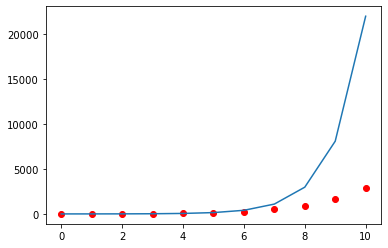

In [2]:
from scipy.misc import derivative
from matplotlib import pyplot as plt
import numpy as np
import sympy as sym

def f(x):
    return np.exp(x)

a=0.0

x=np.linspace(0,10,11)

y=0
for n in range(0,7):
    y=y+derivative(f,a,n=n,order=2*n+1)/np.math.factorial(n)*(x-a)**n
    
plt.scatter(x,y,color='r')
plt.plot(x,f(x))
plt.show()

**Adapte el código para realizar las series de Taylor de $f(x)=e^x$ con:**
- 6 Términos
- 9 Términos
- 12 Términos

In [3]:
#Series de Taylor de f(x)=e^x con x \in [0,10] usando 6, 9 y 12 términos

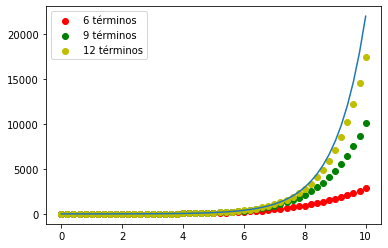

In [4]:
def f(x):
    return np.exp(x)

a=0.0

x=np.linspace(0,10,51)

plt.plot(x,f(x))

y=0
for n in range(0,7):
    y=y+derivative(f,a,n=n,order=2*n+1)/np.math.factorial(n)*(x-a)**n
plt.scatter(x,y,color='r',label="6 términos")
y=0
for n in range(0,10):
    y=y+derivative(f,a,n=n,order=2*n+1)/np.math.factorial(n)*(x-a)**n
plt.scatter(x,y,color='g',label="9 términos")
y=0
for n in range(0,13):
    y=y+derivative(f,a,n=n,order=2*n+1)/np.math.factorial(n)*(x-a)**n
plt.scatter(x,y,color='y',label="12 términos")
y=0

plt.legend()
plt.show()

```{admonition} Pregunta
:class: note
¿Qué observa al comparar las series de Taylor truncadas a diferentes grados de potencia con respecto a la función original?
```

In [5]:
from OptMultiple import MultipleChoice
question = "¿Cuál de las expansión en serie de Taylor es más parecida a la función?"
answers = [
    "La serie truncada hasta la potencia de grado 6.",
    "La serie truncada hasta la potencia de grado 9.",
    "La serie truncada hasta la potencia de grado 12."
]
explanation = (
    "La serie truncada hasta la potencia de grado 12. " 
    "Entre más términos se sumen más parecida será la serie truncada a la función, "
    "y la igualdad se dará cuando no se trunque ningún término."
)

In [6]:
MultipleChoice(
    question, answers, correct_answer=2, explanation=explanation
)

## Serie de Fourier

Una función periódica se puede aproximar por
\begin{equation*}
f(x)=\frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos \left( \frac{2n\pi}{T}x \right) + b_n \sin \left( \frac{2n\pi}{T}x \right) \right]
\end{equation*}

donde
\begin{equation*}
a_0 = \frac{2}{T} \int\limits_{-T/2}^{T/2} f(x) dx
\end{equation*}
\begin{equation*}
a_n = \frac{2}{T} \int\limits_{-T/2}^{T/2} f(x) \cos \left( \frac{2n\pi}{T}x \right) dx
\end{equation*}
\begin{equation*}
b_n = \frac{2}{T} \int\limits_{-T/2}^{T/2} f(x) \sin \left( \frac{2n\pi}{T}x \right) dx
\end{equation*}


**Haga la expansión en series de Fourier de la $f(x)=x$ en el intervalo $x \in [-10,10]$ con $n=10$**

In [7]:
# Serie de Fourier

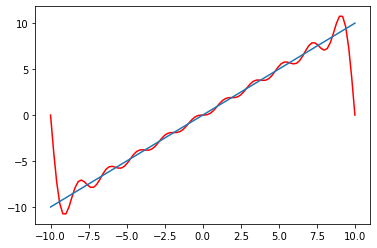

In [8]:
from scipy import integrate
from matplotlib import pyplot as plt
import numpy as np

a=-10.0
b=10.0

T=b-a

x=np.linspace(a,b,100)

a_0 = 2.0/T*integrate.quad(lambda x: x,a,b)[0]
y = a_0/2.0*x**0.0

for n in range(1,11):
    a_n = 2.0/T*integrate.quad(lambda x: x*np.cos(2*n*np.pi/T*x),a,b)[0]
    b_n = 2.0/T*integrate.quad(lambda x: x*np.sin(2*n*np.pi/T*x),a,b)[0]
    y=y+a_n*np.cos(2*n*np.pi/T*x)+b_n*np.sin(2*n*np.pi/T*x)
    
plt.plot(x,y,color='r')
plt.plot(x,x)
plt.show()

**Realice la expansión en series de Fourier de la función escalón en el intervalo $x \in [-10,10]$ con $n=10$**

\begin{equation*}
f(x) = \left\{
  \begin{array}{ll}
  0      & \mathrm{si\ } x < 0\\
  1 & \mathrm{si\ } x>0 \\
  \end{array}
  \right.
\end{equation*}


In [9]:
# Serie de Fourier

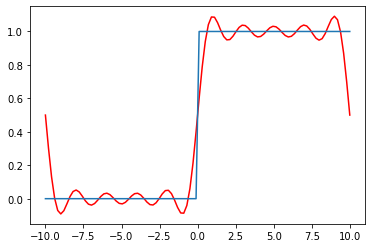

In [10]:
from scipy import integrate
from matplotlib import pyplot as plt
import numpy as np

a=-10.0
b=10.0

T=b-a

x=np.linspace(-10,10,100)

a_0 = 2.0/T*integrate.quad(lambda x: np.piecewise(x,x>=0,[1,0]),a,b)[0]
y = a_0/2.0*x**0.0

for n in range(1,11):
    a_n = 2.0/T*integrate.quad(lambda x: np.piecewise(x,x>=0,[1,0])*np.cos(2*n*np.pi/T*x),a,b)[0]
    b_n = 2.0/T*integrate.quad(lambda x: np.piecewise(x,x>=0,[1,0])*np.sin(2*n*np.pi/T*x),a,b)[0]
    y=y+a_n*np.cos(2*n*np.pi/T*x)+b_n*np.sin(2*n*np.pi/T*x)
    
plt.plot(x,y,color='r')
plt.plot(x,np.piecewise(x,x>=0,[1,0]))
plt.show()

## Referencias

- G.P. Tolstov, Fourier Series (Dover ed., 1992).
- J.D. Jackson, Mathematics for Quantum Mechanics: An Introductory Survey of Operators, Eigenvalues, and Linear Vector Spaces (Dover ed., 2006).
- J.L. Gersting, Technical Calculus with Analytic Geometry (Dover ed., 2009).